In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df = pd.read_csv('Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


# Exploratory Data Analysis (EDA)

In [27]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [28]:
df.shape

(164, 8)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [30]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [31]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [32]:
# printing the unique values in all the columns

categorial_features_list = ["Gender", "Education", "Marital Status","Home Ownership","Credit Score"]

for col in df.columns:
  if col  in categorial_features_list:
    print(col, df[col].unique())
    print("-"*50)

Gender ['Female' 'Male']
--------------------------------------------------
Education ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
--------------------------------------------------
Marital Status ['Single' 'Married']
--------------------------------------------------
Home Ownership ['Rented' 'Owned']
--------------------------------------------------
Credit Score ['High' 'Average' 'Low']
--------------------------------------------------


In [33]:
# checking the class distribution of target column
print(df["Credit Score"].value_counts())

Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


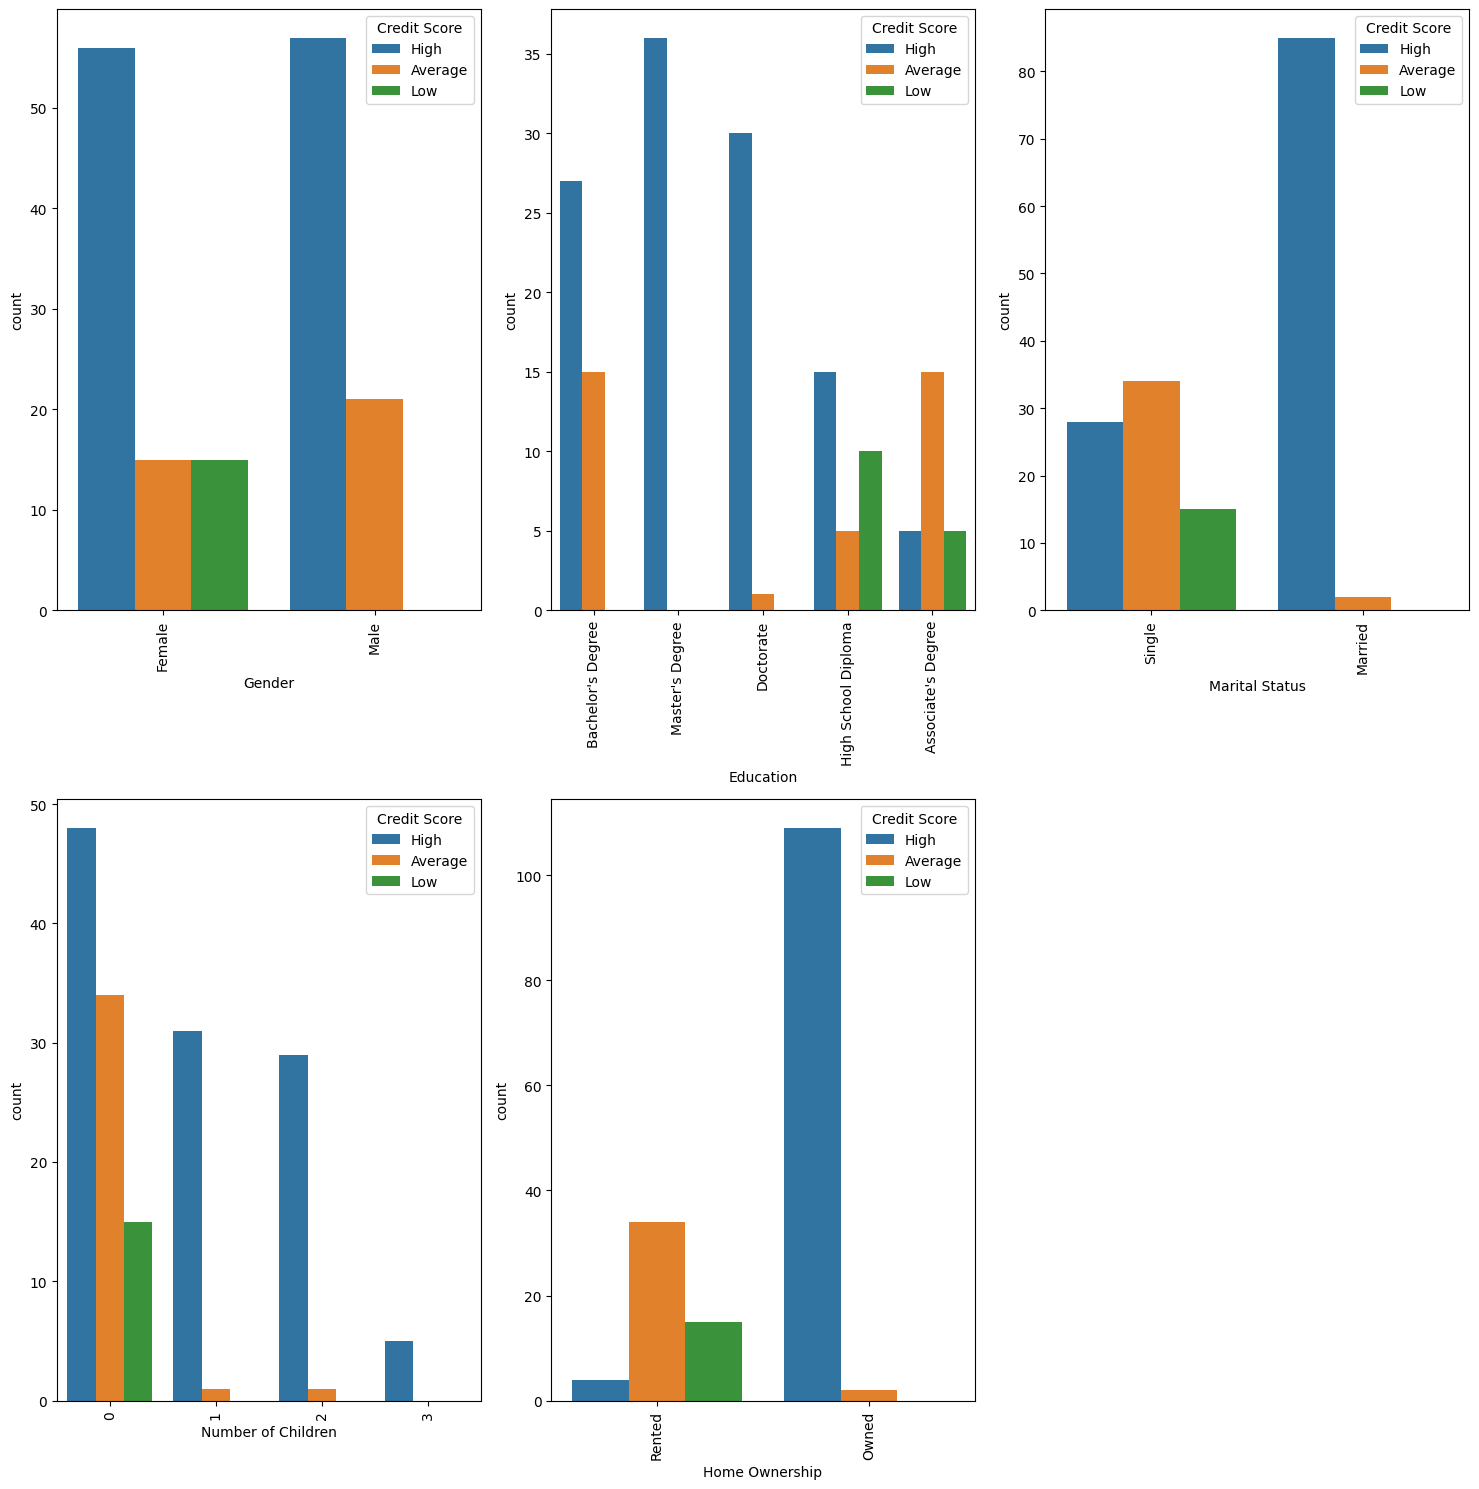

In [23]:
# list of categorical variables to plot
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Credit Score', data=df, ax=axs[i])
    plt.setp(axs[i].get_xticklabels(), rotation=90)  # This is the corrected way to rotate labels

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

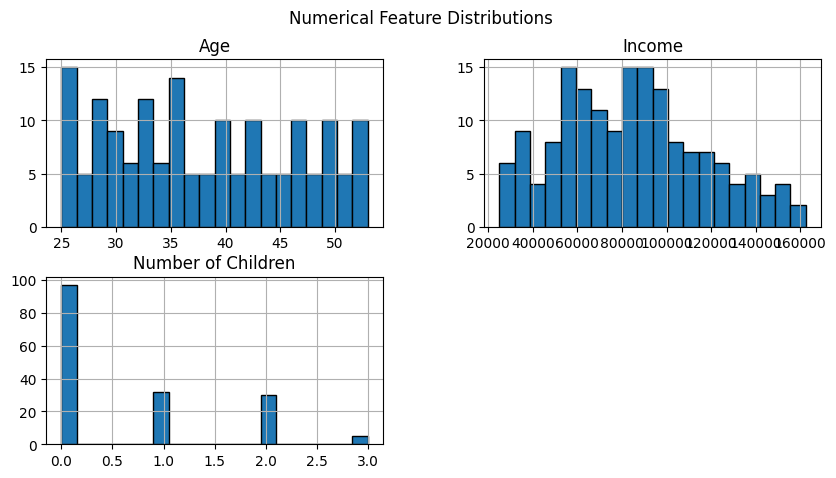

In [26]:
# Distribution of numerical features
numerical_features = ['Age', 'Income', 'Number of Children']
df[numerical_features].hist(figsize=(10, 5), bins=20, edgecolor="black")
plt.suptitle("Numerical Feature Distributions")
plt.show()

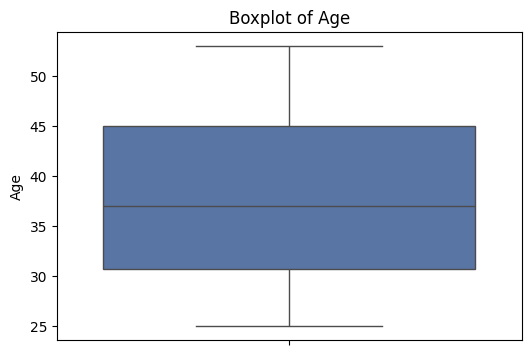

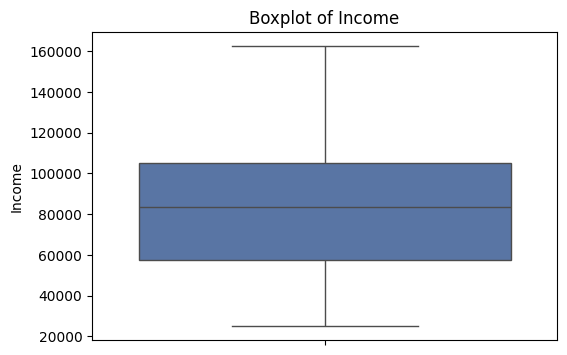

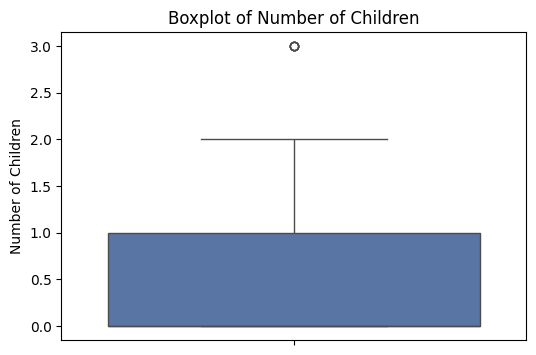

In [35]:
# Boxplots for detecting outliers
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='#4C72B0')  # Using a single color instead of palette
    plt.title(f"Boxplot of {col}")
    plt.show()

# Data Preprocessing

In [36]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

** Label Encoding for object datatypes **

In [37]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [38]:
print(object_columns)

Index(['Gender', 'Education', 'Marital Status', 'Home Ownership',
       'Credit Score'],
      dtype='object')


In [40]:
from sklearn.preprocessing import LabelEncoder
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

In [41]:
encoders

{'Gender': LabelEncoder(),
 'Education': LabelEncoder(),
 'Marital Status': LabelEncoder(),
 'Home Ownership': LabelEncoder(),
 'Credit Score': LabelEncoder()}

<Axes: >

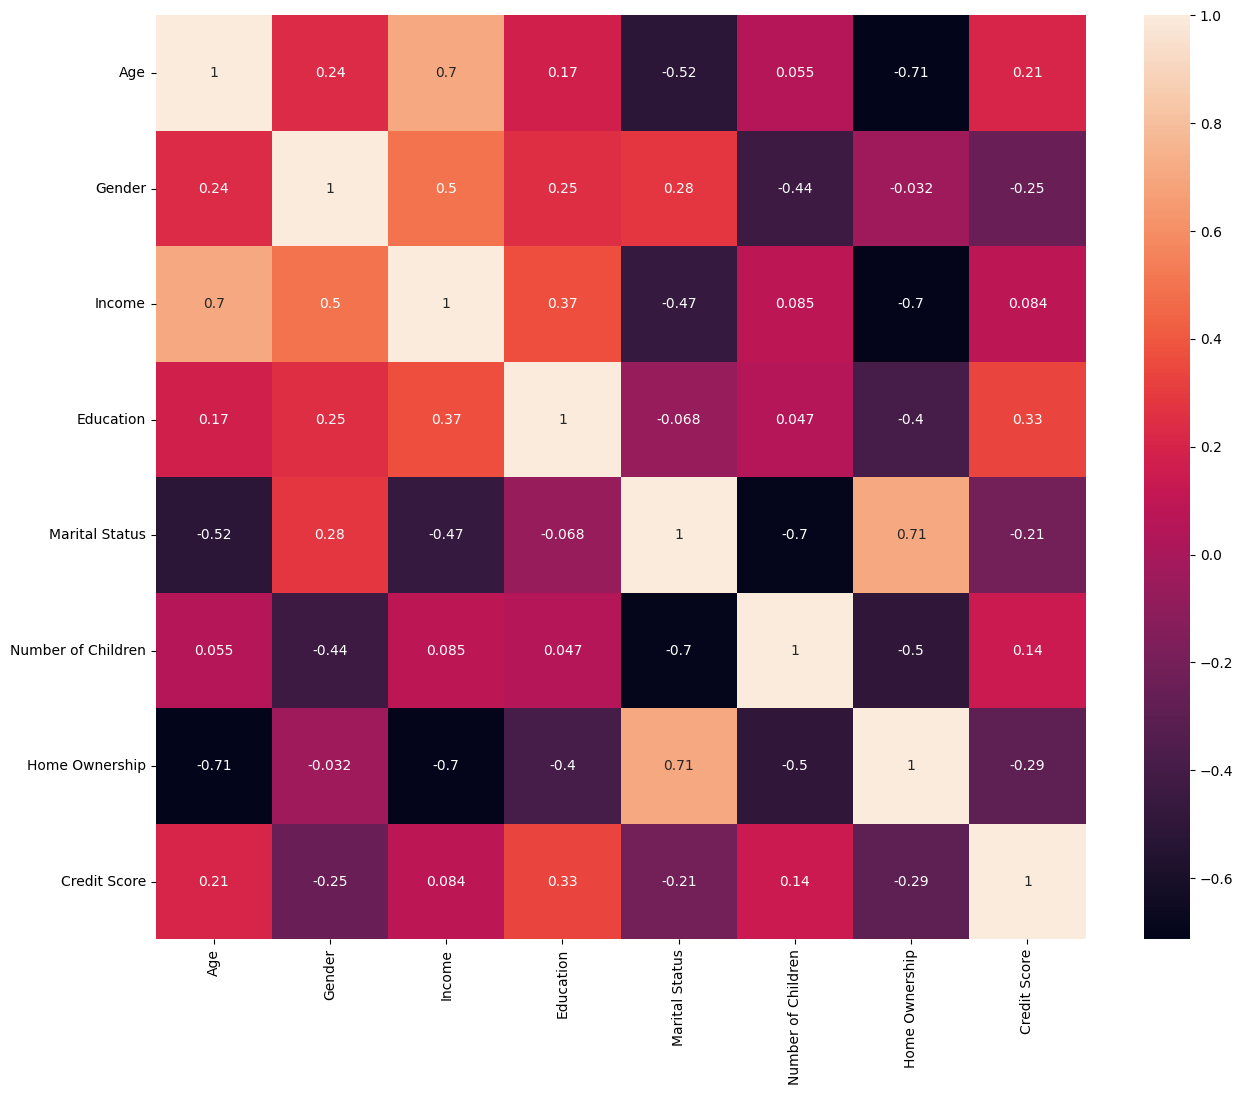

In [42]:
#Correlation Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [43]:
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

In [45]:
from sklearn.model_selection import train_test_split
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(y_train.shape)

(131,)


In [47]:
print(y_train.value_counts())

Credit Score
1    90
0    31
2    10
Name: count, dtype: int64


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [50]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.97 %


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9696969696969697
Precision Score :  0.9696969696969697
Recall Score :  0.9696969696969697
Jaccard Score :  0.9411764705882353


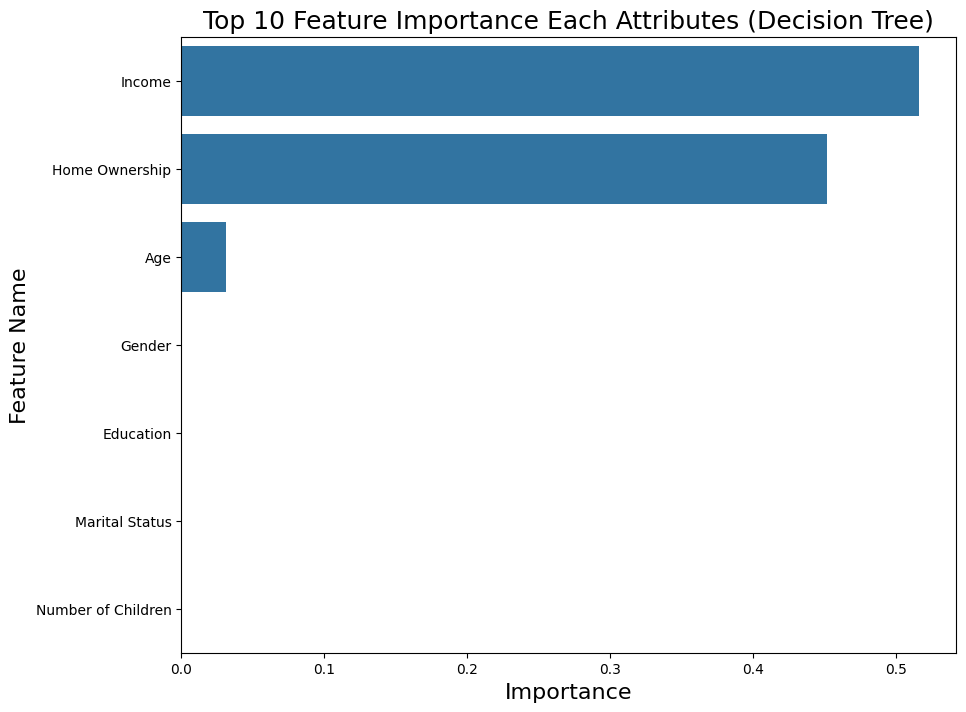

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9696969696969697')

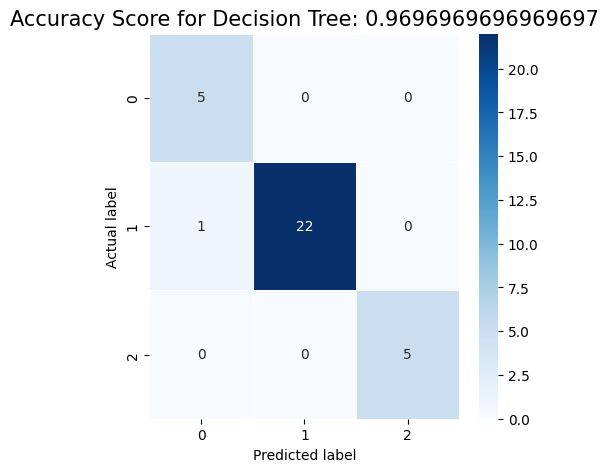

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)